# Python Basics, Built-in Structures, Functions, Files, Numpy

Geohashing is an outdoor sport activity played around the world since 2008. Contestents need to adventure to a geocoordinate generated by an algorithm that derives randomness from stock market data (as you should all know Eugene Fama's EMH).

The algorithm is explained as below from [XKCD](https://xkcd.com/426/):

![](https://imgs.xkcd.com/comics/geohashing.png)


It described a way for a computer to create an algorithm that could generate random Global Positioning System (GPS) coordinates each day based on the Dow Jones Industrial Average (DJIA) and the current date.

Now your task is to decode the geohashed secret location by using Nova SBE's geocoordinate, current date (e.g., September 13, 2023) as well as the opening of DJIA on that day. Luckily, Python already has a library to calculate the geohasing using the `geohash` function in `antigravity` package:


```python
from antigravity import geohash
geohash(37.421542, -122.085589, b'2005-05-26-10458.68')
```
The first and second parameter takes the lat/lon of your preferred location and the third parameter takes the date as well as the opening of DJIA on that day, connected by `-`.

Now calculate the geohashed location using Nova SBE's geocoordinates (38.678223, -9.326266), and the current date, and the opening of the DJIA with two decimals (you can find this at any finance news or just Google it!).

Once you decode the location, go to google map, find out the address and write it down in the answer.

We will use the ```geohash``` function in ```antigravity``` package to calculate the geocoordinates:

In [1]:
from antigravity import geohash

# Initializing the varibales
NOVA_lat = 38.678223
NOVA_long = -9.326266

current_date = "2023-09-13"
DJIA = 34667.28

# Building up the parameter
parameter = f"{current_date}-{DJIA}" # Zeno Eule suggested the idea of constructing the parameter in that manner.


geohash(NOVA_lat, NOVA_long, parameter.encode())

38.725829 -9.180165


You can go to Google Map and type the obtained the geocoordinates and show the address of the geocoordinates

Found coordinates: 38.725829, -9.180165

--> Benfica, Lissabon (PRG9+8WP Lissabon)

Google maps: https://www.google.com/maps/place/38°43'33.0%22N+9°10'48.6%22W/@38.7257761,-9.1829929,16.7z/data=!4m4!3m3!8m2!3d38.725829!4d-9.180165?entry=ttu

The number $e$, known as [Euler's number](https://en.wikipedia.org/wiki/E_(mathematical_constant)) (named after the Swiss mathematician Leonhard Euler), is a mathematical constant.  It is the base of the natural logarithm. It is the limit of $(1 + \frac{1}{n})^n$ as $n$ approaches infinity, an expression that arises in the study of compound interest, as your all know from your economics/finance 101 course.

Back in 18th century, Euler derived this number through the following equation:

$e = \frac{1}{0!}+\frac{1}{1!}+\frac{1}{2!}+\frac{1}{3!}+\frac{1}{4!}\dots+\frac{1}{n!}$

Now let's stand on the giant's shoulder to get our own $e$.

In [2]:
def factorial(n):
    if n < 0:
        print("Error!")
    elif n == 0: 
        return 1
    else:
        return n * factorial(n-1)
    
Eulers_number = []

for n in range(11):
    entry_n = sum([1/factorial(i) for i in range(n+1)])
    Eulers_number.append(entry_n)
    if n % 2 > 0:
        print(n, ":", Eulers_number[n])

1 : 2.0
3 : 2.6666666666666665
5 : 2.7166666666666663
7 : 2.7182539682539684
9 : 2.7182815255731922


**Rationale:** In order to calculate the factorial, I use recursion. For printing, I then use range(*11*) to ensure that n goes from 0 to 10, 0 and 10 both being inclusive. All the values are stored in the list "Eulers_number" but I only printed out the odd numbered entries. 

### Monte Carlo

Monte Carlo is a city in Monacco where the famous Monte Carlo casino is located.

In light of this, Monte Carlo methods (or Monte Carlo experiments) are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. Their essential idea is using randomness to solve problems that might be deterministic in principle. They are often used in physical and mathematical problems and are most useful when it is difficult or impossible to use other approaches. Monte Carlo methods are mainly used in three problem classes: optimization, numerical integration, and generating draws from a probability distribution.

Estimate the Pi

In order to estimate the 𝜋, the idea is to simulate random (x, y) points in a 2-D plane with domain as a square of side 1 unit. Imagine a circle inside the same domain with same diameter and inscribed into the square. We can generate a large number of uniformly distributed random points and plot them on the graph. These points can be in any position within the square i.e. between (0,0) and (1,1). We keep track of the total number of points, and the number of points that are inside the circle. If we divide the number of points within the circle,  𝑁𝑖𝑛𝑛𝑒𝑟 by the total number of points,  𝑁𝑡𝑜𝑡𝑎𝑙, we should get a value that is an approximation of the ratio of the areas we calculated above,  𝜋/4
 .

Write a function approximate_pi with argument number_simulations to approximate the Pi value using Monte Carlo simulations. 

**Note:** As I already mentioned after the lecture on the 19th September, I will not assume that the circle has a diameter 
of 1 unit and is inscribed into the square. In order to solve this task, I assume that the circle has a radius of 
1 unit, with the origin of the plot being the center of the circle. This leads to the sitatuation in which exactly
1/4 of the circle is inscribed in the square. Based on that, I can define the set of points in the circle as the 
set of points having a distance to the origin of less than 1 unit.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def approximate_pi(number_simulations):
    # Generate random points
    points = np.random.rand(number_simulations, 2)
    
    # Calculate the distance from the origin for each point using np.linalg
    distances = np.linalg.norm(points, axis=1)

    # Count the number of points inside the circle
    # --> Here I use the fact that I deal with a circle with radius one centered at the origin of the graph
    inside_circle = np.sum(distances <= 1)

    # Approximate pi
    pi_approximation = (inside_circle / number_simulations) * 4
    
    return pi_approximation, points

# how many simulations does it need to achieve an accuracy of 99.99%
accuracy = 0.9999

aux = 0
for i in range(100):
    accuracy_reached = False
    num_simulations = 0
    while accuracy_reached == False:
        num_simulations += 1
        pi, points = approximate_pi(num_simulations)
    
        # Getting the reached accuracy
        if np.pi > pi:
            reached_accuracy = pi / np.pi
        else:
            reached_accuracy = np.pi / pi

        # Printing the solution
        if reached_accuracy >= accuracy:
            accuracy_reached = True
            aux += num_simulations
        
            # Create a scatter plot
            #plt.scatter(points[:, 0], points[:, 1])

            # Display the plot
            #plt.show()
print(aux/100)


466.16


**Rationale:** In order to get a good estimate for the number of simulations it takes to reach a 99.99% accuracy, I started at 1 simulation and increased the number of simulations by one, each time, the accuracy was not reached. Once the accuracy is reached I do not simply print out the number of simulations it took, but rather just store the value. I repeat this procedure 100 times to "get rid" of outliers and therefore getting a solid estimate of the number of simulations it takes.

--> Answer: It takes roughly 450 simulations in order to reach a 99.99% accuracy.

**Note:** Without the outer for loop (repeating the procedure 100 times) it is possible to plot the simulations in a scatter plot (see comments in the code). Plotting, however, does not make sense when repeating this procedure 100 times.

Is it Instagrammable?

Consider any photo you take at Carcavelos beach:

![image](https://www.lisbonbeachesguide.com/images/carcavelos-beach-lisbon.jpg)

On this exercise, you will apply a filter to the image in a process called convolution. This process uses the filter as a matrix that is multiplied as a sliding window to an image. The resulted matrix has a smaller shape than the original, to ensure the same shape consider a padding with value 0 that enables the filter to slide throw every pixel value as shown in the following image:

<br>

![padding](https://media5.datahacker.rs/2018/11/sl_1.png)

<br><br>

This question requires the `numpy` and `Pillow` libraries that may already be installed on your enviroment. However, if you have a problem importing this libraries, install it via pip. Example for Pillow: `pip install Pillow`

<br>

Consider the following code to convert an image into a numpy array:

```python
from PIL import Image
from numpy import asarray

# load the image
image = Image.open('carcavelos.jpg')

# convert image to numpy array
data = asarray(image)
```



You can save a numpy array as an image with the following code:

```python
"""
color image
"""

# convert numpy array to image
img = Image.fromarray(data, 'RGB')

# save image and .png
img.save('image.png')

"""
grayscale image
"""

# convert numpy array to image
data = data.astype(np.uint8)
img = Image.fromarray(data)

# save grayscale image as .png
img.save('image.png')

# display image
from IPython.display import Image
Image(filename='carcavelos-sharpen.png')
```

What is the shape of the image?


In [4]:
from PIL import Image
import numpy as np

# load the image
image = Image.open('carcavelos.jpg')
data = np.asarray(image)

data.shape

(515, 780, 3)

The result (515, 780, 3) has three elements. The first element describes the height of the picture in pixels, here: 515. The second element describes the width of the picture, here: 780, while the last element indicates the color channels. As this picture is in color, the color channels dimension is equal to 3, because it used the RGB (Red Green Blue) format.

Save the "carcavelos.jpg" image as a grayscale image into "carcavelos-grayscale.png". The image should result from a numpy array with only one channel instead of 3, consider the following weights for each channel: 0.30*R + 0.59*G + 0.11*B

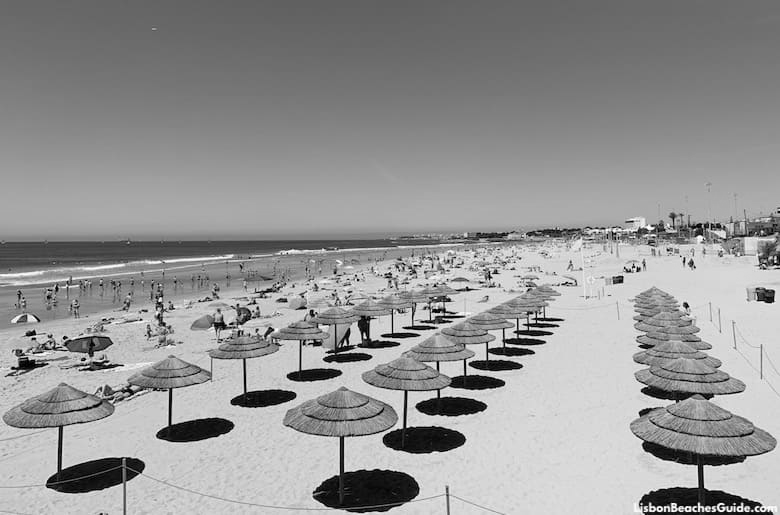

In [5]:
# Convert the image to a grayscale numpy array
gray_array = np.dot(data[..., :3], [0.30, 0.59, 0.11]).astype(np.uint8)

# Create a grayscale PIL Image from the numpy array
gray_image = Image.fromarray(gray_array)

# Save the grayscale image as "carcavelos-grayscale.png"
gray_image.save('carcavelos-grayscale.png')

# Display the saved image using IPython.display
from IPython.display import display, Image as IPImage # import display, Image as IPImage --> hint from ChatGPT
display(IPImage(filename='carcavelos-grayscale.png'))

Save the "carcavelos.jpg" image into "carcavelos-sharpen.png" with the applied filter: `np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])` and then display the sharpen image.


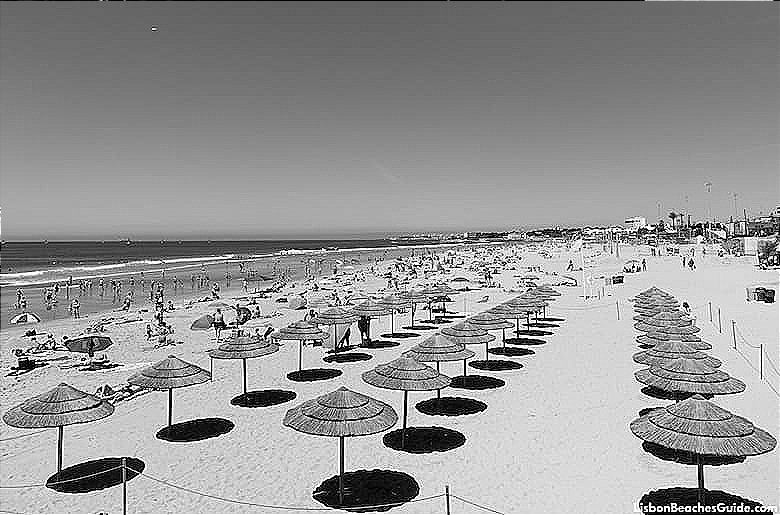

In [6]:
from scipy.signal import convolve2d #hint from ChatGPT

sharpen_filter = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

# Apply the filter using convolution --> hint from ChatGPT
filtered_image_array = convolve2d(gray_array, sharpen_filter, mode='same', boundary='wrap')

# Clip the values to ensure they are within the valid range for an image --> hint from ChatGPT
filtered_image_array = np.clip(filtered_image_array, 0, 255).astype(np.uint8)

# convert numpy array to image
filtered_image = Image.fromarray(filtered_image_array)

# save image and .png
filtered_image.save('carcavelos-sharpen.png')

# Display the saved image using IPython.display
from IPython.display import display, Image as IPImage # Image as IPImage was a hint from ChatGPT
display(IPImage(filename='carcavelos-sharpen.png'))

**Note:** We agreed in the lecture that it does not matter whether we sharpen the grayscaled image or the colored image. I decided to sharpen the grayscaled picture.